# Nuclear Reaction Kinematics Calculator  
### Non-relativistic two-body nuclear reaction calculator  
p + T → b + B  

Author: Olalekan John Ojosipe 



In [11]:
import numpy as np
import matplotlib.pyplot as plt

import kinematics_engine as ke

# =========================
# Read input file
# =========================
params = ke.read_input_file("input.txt")

# =========================
# Unpack projectile / target
# =========================
mp_u = params["projectile_mass_u"]
Zp   = int(params["projectile_charge"])

mT_u = params["target_mass_u"]
Zt   = int(params["target_charge"])

# =========================
# Reaction channel
# (elastic by default)
# =========================
mb_u = mp_u     # fragment b
mB_u = mT_u     # residual B

# =========================
# Beam & rate parameters
# =========================
E_lab = params["beam_energy_mev"]

I_pps   = params["intensity_pps"]
t_mgcm2 = params["target_thickness_mgcm2"]
Omega_sr = params["detector_solid_angle_sr"]

A_target = params.get("target_molar_mass_g_mol", mT_u)

# =========================
# Sanity check
# =========================
print("Input parameters loaded successfully.")
print(f"Projectile: mp = {mp_u} u, Zp = {Zp}")
print(f"Target:     mT = {mT_u} u, Zt = {Zt}")
print(f"Beam:       E_lab = {E_lab} MeV")


Input parameters loaded successfully.
Projectile: mp = 4.002602 u, Zp = 2
Target:     mT = 12.0 u, Zt = 6
Beam:       E_lab = 10.0 MeV


In [12]:
curves = kinematics_curves(mp_u, mT_u, mb_u, mB_u, E_lab)


### 5.1 θ_cm vs θ_lab (fragment b)


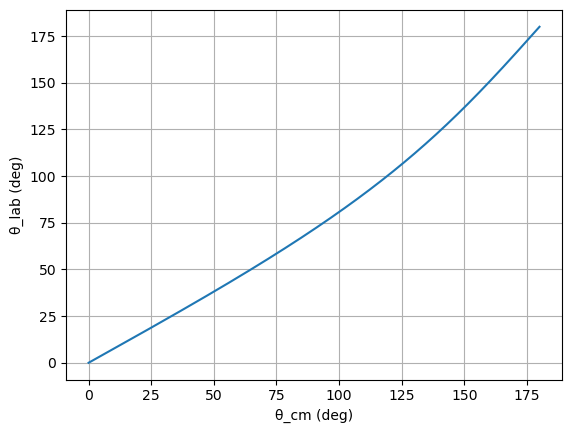

In [13]:
plt.plot(curves["theta_cm"]*RAD2DEG, curves["theta_lab_b"]*RAD2DEG)
plt.xlabel("θ_cm (deg)")
plt.ylabel("θ_lab (deg)")
plt.grid(True)
plt.show()


### 5.2 θ_cm vs θ_lab (residual B)


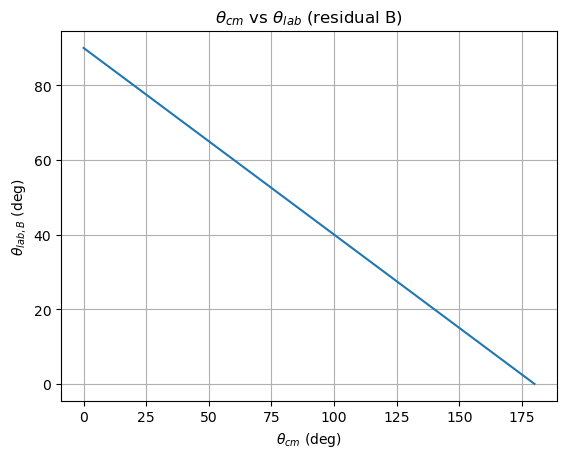

In [14]:
plt.plot(curves["theta_cm"]*RAD2DEG, curves["theta_lab_B"]*RAD2DEG)
plt.xlabel(r"$\theta_{cm}$ (deg)")
plt.ylabel(r"$\theta_{lab,B}$ (deg)")
plt.title(r"$\theta_{cm}$ vs $\theta_{lab}$ (residual B)")
plt.grid(True)
plt.show()


### 5.3 θ_lab,b vs θ_lab,B


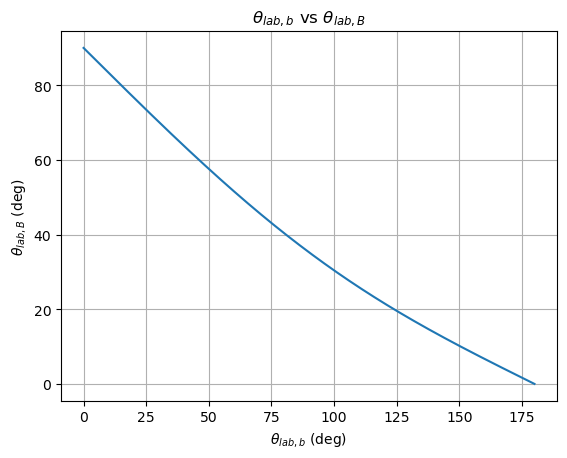

In [15]:
plt.plot(curves["theta_lab_b"]*RAD2DEG, curves["theta_lab_B"]*RAD2DEG)
plt.xlabel(r"$\theta_{lab,b}$ (deg)")
plt.ylabel(r"$\theta_{lab,B}$ (deg)")
plt.title(r"$\theta_{lab,b}$ vs $\theta_{lab,B}$")
plt.grid(True)
plt.show()


### 6.1 E_lab vs θ_lab (fragment b)


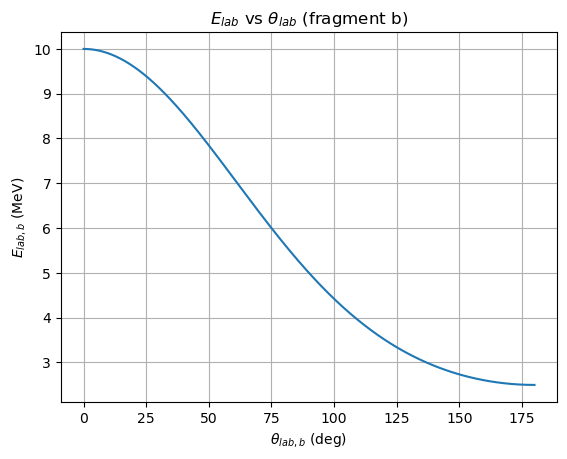

In [16]:
plt.plot(curves["theta_lab_b"]*RAD2DEG, curves["E_lab_b"])
plt.xlabel(r"$\theta_{lab,b}$ (deg)")
plt.ylabel(r"$E_{lab,b}$ (MeV)")
plt.title(r"$E_{lab}$ vs $\theta_{lab}$ (fragment b)")
plt.grid(True)
plt.show()


### 6.2 E_lab vs θ_lab (residual B)


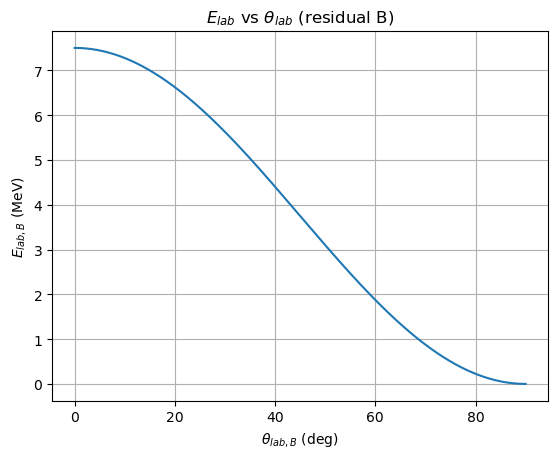

In [17]:
plt.plot(curves["theta_lab_B"]*RAD2DEG, curves["E_lab_B"])
plt.xlabel(r"$\theta_{lab,B}$ (deg)")
plt.ylabel(r"$E_{lab,B}$ (MeV)")
plt.title(r"$E_{lab}$ vs $\theta_{lab}$ (residual B)")
plt.grid(True)
plt.show()


### 6.3 E_lab vs θ_cm (fragment b)


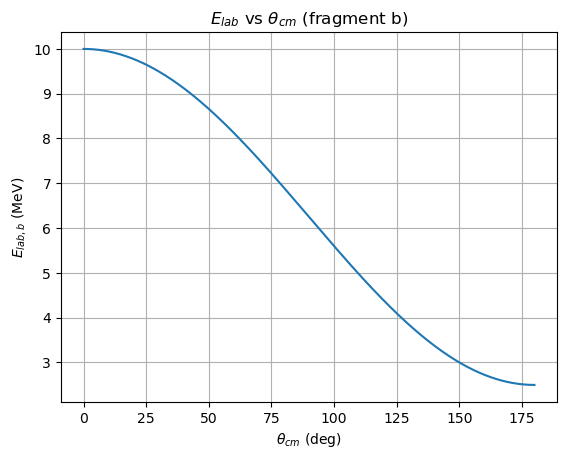

In [18]:
plt.plot(curves["theta_cm"]*RAD2DEG, curves["E_lab_b"])
plt.xlabel(r"$\theta_{cm}$ (deg)")
plt.ylabel(r"$E_{lab,b}$ (MeV)")
plt.title(r"$E_{lab}$ vs $\theta_{cm}$ (fragment b)")
plt.grid(True)
plt.show()


### 6.4 E_lab vs θ_cm (residual B)


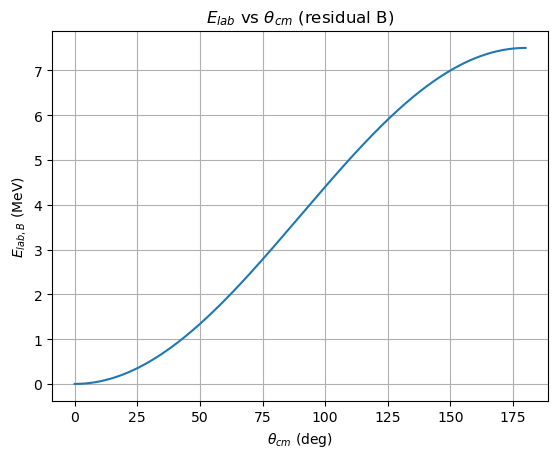

In [19]:
plt.plot(curves["theta_cm"]*RAD2DEG, curves["E_lab_B"])
plt.xlabel(r"$\theta_{cm}$ (deg)")
plt.ylabel(r"$E_{lab,B}$ (MeV)")
plt.title(r"$E_{lab}$ vs $\theta_{cm}$ (residual B)")
plt.grid(True)
plt.show()


## Rutherford Scattering in the Center-of-Mass Frame

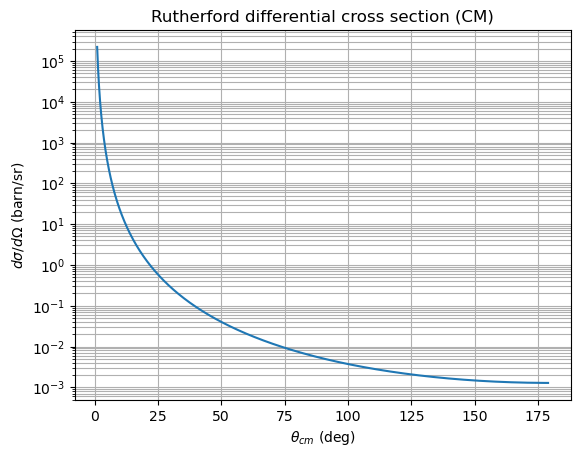

In [31]:
# Rutherford Scattering in the Center-of-Mass Frame
E_cm = ke.e_cm_from_e_lab(E_lab, mp_u, mT_u)

theta_cm = np.deg2rad(np.linspace(1, 179, 2000))
dsdo = ke.rutherford_dsdo_cm(theta_cm, E_cm, int(Zp), int(Zt), out="barn")

plt.semilogy(np.rad2deg(theta_cm), dsdo)
plt.xlabel(r"$\theta_{cm}$ (deg)")
plt.ylabel(r"$d\sigma/d\Omega$ (barn/sr)")
plt.title("Rutherford differential cross section (CM)")
plt.grid(True, which="both")
plt.show()


## Expected Detector Rate from Rutherford Scattering

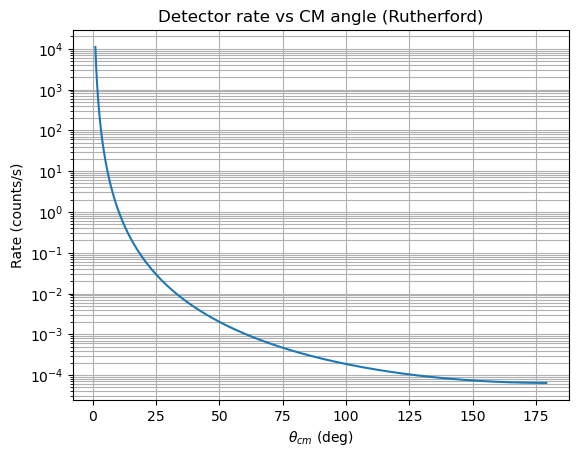

In [32]:
# Expected Detector Rate from Rutherford Scattering
R = ke.rate_counts_per_s(dsdo, I_pps, t_mgcm2, A_target, Omega_sr)

plt.semilogy(np.rad2deg(theta_cm), R)
plt.xlabel(r"$\theta_{cm}$ (deg)")
plt.ylabel("Rate (counts/s)")
plt.title("Detector rate vs CM angle (Rutherford)")
plt.grid(True, which="both")
plt.show()


In [22]:
print("Any NaN in theta_lab_b?", np.isnan(curves["theta_lab_b"]).any())
print("Any NaN in E_lab_b?", np.isnan(curves["E_lab_b"]).any())


Any NaN in theta_lab_b? False
Any NaN in E_lab_b? False


In [23]:
if (abs(mb_u-mp_u) < 1e-9) and (abs(mB_u-mT_u) < 1e-9):
    tot = curves["E_lab_b"] + curves["E_lab_B"]
    print("E_lab:", E_lab)
    print("Total energy min/max:", tot.min(), tot.max())


E_lab: 10.0
Total energy min/max: 9.999999999999996 10.000000000000004


In [24]:
def split_two_branches(theta_cm, theta_lab):
    # split at maximum theta_lab (turning point)
    i0 = np.argmax(theta_lab)
    return (theta_cm[:i0+1], theta_lab[:i0+1]), (theta_cm[i0:], theta_lab[i0:])


In [25]:
import importlib, kinematics_engine
importlib.reload(kinematics_engine)

print("Has sigma_lab_from_sigma_cm?", hasattr(kinematics_engine, "sigma_lab_from_sigma_cm"))
print("Has split_two_branches?", hasattr(kinematics_engine, "split_two_branches"))
print("Has x_parameter?", hasattr(kinematics_engine, "x_parameter"))


Has sigma_lab_from_sigma_cm? True
Has split_two_branches? True
Has x_parameter? True


In [26]:
import importlib, kinematics_engine
importlib.reload(kinematics_engine)

print("Jacobian:", hasattr(kinematics_engine, "sigma_lab_from_sigma_cm"))
print("x parameter:", hasattr(kinematics_engine, "x_parameter"))
print("Splitting:", hasattr(kinematics_engine, "split_two_branches"))


Jacobian: True
x parameter: True
Splitting: True


In [27]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import kinematics_engine

importlib.reload(kinematics_engine)

from kinematics_engine import (
    kinematics_curves, RAD2DEG,
    e_cm_from_e_lab, rutherford_dsdo_cm,
    sigma_lab_from_sigma_cm, split_two_branches,
    x_parameter
)

# Example: alpha on proton (heavy-on-light, elastic)
mp_u = 4.002602
mT_u = 1.007825
mb_u = mp_u
mB_u = mT_u
E_lab = 10.0

Zp, Zt = 2, 1  # charges for Rutherford

curves = kinematics_curves(mp_u, mT_u, mb_u, mB_u, E_lab)
theta_cm = curves["theta_cm"]
theta_lab_b = curves["theta_lab_b"]

E_cm = e_cm_from_e_lab(E_lab, mp_u, mT_u)
x = x_parameter(mp_u, mT_u, mb_u, mB_u, E_lab)

print("E_cm =", E_cm, "MeV")
print("x = V_cm / v'_b =", x)


E_cm = 2.011455311094244 MeV
x = V_cm / v'_b = 3.971524818296827


In [28]:
# Rutherford (CM) for the same theta_cm grid (avoid 0 exactly if your dsdo rejects it)
eps = np.deg2rad(1e-3)
theta_cm_safe = np.clip(theta_cm, eps, np.pi - eps)

dsdo_cm = rutherford_dsdo_cm(theta_cm_safe, E_cm, Zp, Zt, out="barn")

# Split at turning point in theta_lab (important for heavy-on-light)
(branch1_cm, branch1_lab), (branch2_cm, branch2_lab) = split_two_branches(theta_cm_safe, theta_lab_b)

# CM dsdo on each branch
dsdo_cm_1 = rutherford_dsdo_cm(branch1_cm, E_cm, Zp, Zt, out="barn")
dsdo_cm_2 = rutherford_dsdo_cm(branch2_cm, E_cm, Zp, Zt, out="barn")

# Transform to LAB using Jacobian
dsdo_lab_1 = sigma_lab_from_sigma_cm(branch1_cm, branch1_lab, dsdo_cm_1, x)
dsdo_lab_2 = sigma_lab_from_sigma_cm(branch2_cm, branch2_lab, dsdo_cm_2, x)


## Transformation of Rutherford Cross Section from CM to LAB Frame


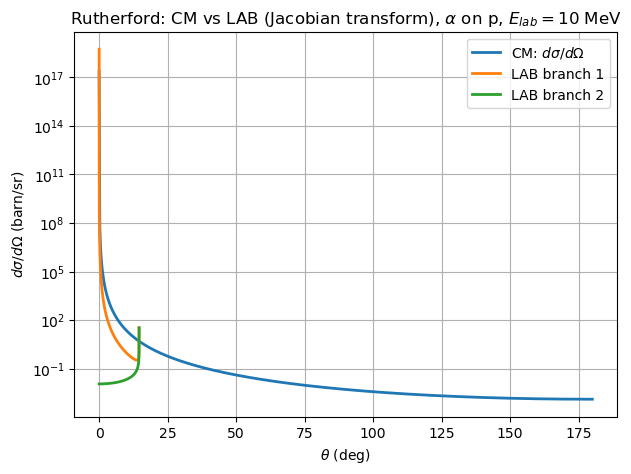

In [29]:
plt.figure(figsize=(7,5))

# CM reference
plt.semilogy(np.rad2deg(theta_cm_safe), dsdo_cm, label=r"CM: $d\sigma/d\Omega$", linewidth=2)

# LAB branches
plt.semilogy(np.rad2deg(branch1_lab), dsdo_lab_1, label=r"LAB branch 1", linewidth=2)
plt.semilogy(np.rad2deg(branch2_lab), dsdo_lab_2, label=r"LAB branch 2", linewidth=2)

plt.xlabel(r"$\theta$ (deg)")
plt.ylabel(r"$d\sigma/d\Omega$ (barn/sr)")
plt.title(r"Rutherford: CM vs LAB (Jacobian transform), $\alpha$ on p, $E_{lab}=10$ MeV")
plt.grid(True, which="both")
plt.legend()
plt.show()


## Jacobian Factor and Kinematic Focusing

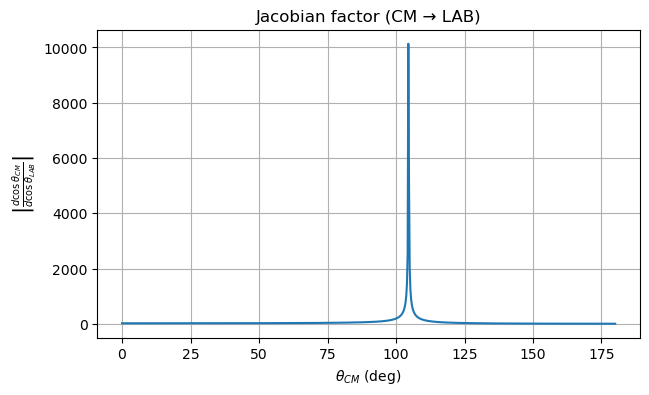

In [30]:
# Use full arrays (avoid endpoints)
J = np.abs(1.0 / ((1 + x*np.cos(theta_cm_safe)) / (1 + x**2 + 2*x*np.cos(theta_cm_safe))**(3/2)))

plt.figure(figsize=(7,4))
plt.plot(np.rad2deg(theta_cm_safe), J)
plt.xlabel(r"$\theta_{CM}$ (deg)")
plt.ylabel(r"$\left|\frac{d\cos\theta_{CM}}{d\cos\theta_{LAB}}\right|$")
plt.title("Jacobian factor (CM → LAB)")
plt.grid(True)
plt.show()
